In [1]:
# Import basic libraries
import numpy as np 
import pandas as pd
import joblib # for saving models

In [2]:
# Load local data
data = pd.read_csv('data/data_clean.csv',index_col = 'ID')

# K Nearest Neighbor

KNN performs better when all features are numerical and continuous, here, we map all categorical features to a numerical values.

In [3]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve,auc
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Import module to standardize the scale
from sklearn.preprocessing import StandardScaler
# Create instance of the standard scaler
scaler = StandardScaler()
scaler.fit(data.drop('def_pay', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [5]:
scaled_features = scaler.transform(data.drop('def_pay',axis=1))
scaled_features

array([[-1.13672015,  0.81016074,  0.25629492, ..., -0.30806256,
        -0.31413612, -0.29338206],
       [-0.3659805 ,  0.81016074,  0.25629492, ..., -0.24422965,
        -0.31413612, -0.18087821],
       [-0.59720239,  0.81016074,  0.25629492, ..., -0.24422965,
        -0.24868274, -0.01212243],
       ...,
       [-1.05964618, -1.23432296,  0.25629492, ..., -0.03996431,
        -0.18322937, -0.11900109],
       [-0.67427636, -1.23432296,  1.66219137, ..., -0.18512036,
         3.15253642, -0.19190359],
       [-0.90549825, -1.23432296,  0.25629492, ..., -0.24422965,
        -0.24868274, -0.23713013]])

In [6]:
# Use the scaled features to creata a data frame
features=pd.DataFrame(scaled_features,columns=data.columns[:-1])

In [7]:
# Import module to split the data
from sklearn.model_selection import train_test_split
X=features
y=data['def_pay']

In [8]:
# Import module for KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=173)

In [9]:
from sklearn.model_selection import cross_val_score,cross_val_predict
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')

In [10]:
scores.mean()

0.8064666666666668

In [11]:
# get predicted class for y
y_pred_class = cross_val_predict(knn,X,y,cv=10)

In [12]:
# Import classification report and confusion matrix to evaluate predictions
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:", "\n", confusion_matrix(y, y_pred_class))
print("Classification Report:","\n", classification_report(y, y_pred_class))
cmat = confusion_matrix(y, y_pred_class)
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

Confusion Matrix: 
 [[22467   897]
 [ 4909  1727]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.96      0.89     23364
           1       0.66      0.26      0.37      6636

    accuracy                           0.81     30000
   macro avg       0.74      0.61      0.63     30000
weighted avg       0.78      0.81      0.77     30000

Accuracy Rate: 0.8064666666666667
Misclassification Rate: 0.19353333333333333


### Evaluate alternative K-values for better predictions

In [13]:
error_rate = []
for i in range(1,200):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    y_pred_class = cross_val_predict(knn,X,y,cv=10)
    error_rate.append(np.mean(y_pred_class != y))

Text(0, 0.5, 'Error Rate')

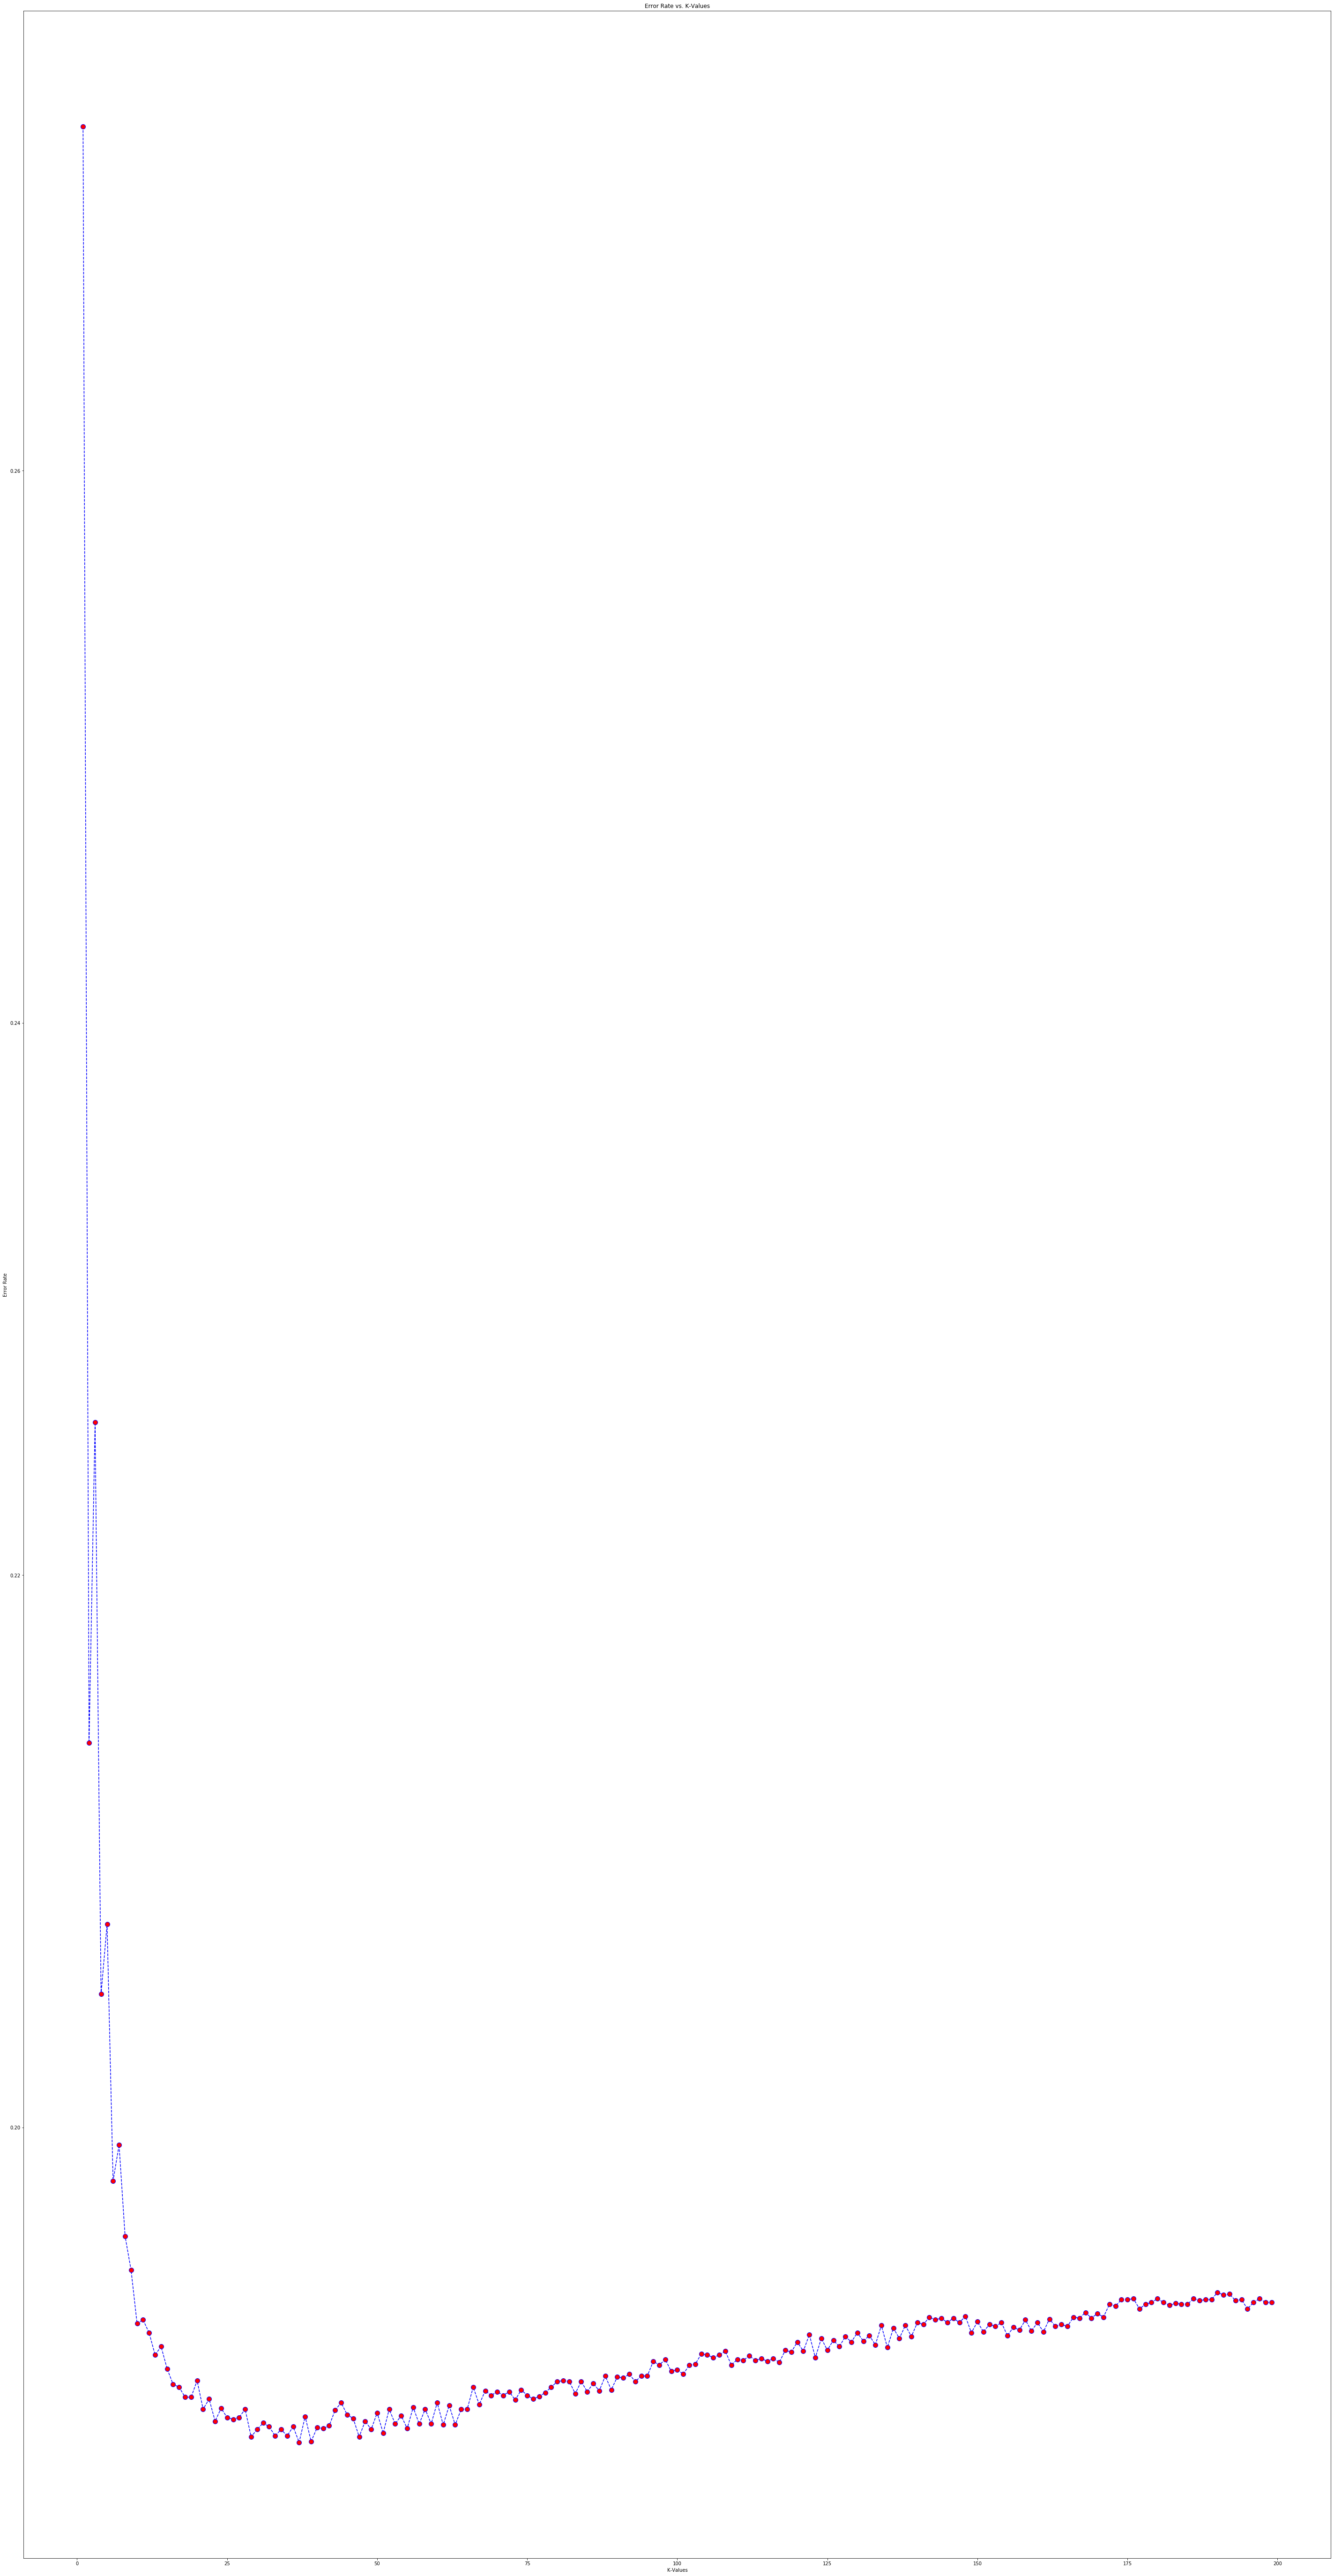

In [16]:
# Configure and plot error rate over k values
plt.figure(figsize=(50,100))
plt.plot(range(1,200), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K-Values')
plt.xlabel('K-Values')
plt.ylabel('Error Rate')

The k-value of 23 seems to give a decent error rate without too much noise, as we see with k-values of 28 and larger.

### Fine tune the model

In [17]:
# Retrain model using optimal k-value
knn = KNeighborsClassifier(n_neighbors=23)
y_pred_class = cross_val_predict(knn,X,y,cv=10)

### Model Evaluation

In [19]:
from sklearn.model_selection import cross_val_score,cross_val_predict
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
scores.mean()

0.8106333333333333

In [20]:
cmat = confusion_matrix(y, y_pred_class)
print("Confusion Matrix:", "\n", confusion_matrix(y, y_pred_class))
print('TP - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TN - True Positive {}'.format(cmat[1,1]))
print()
print("Classification Report:","\n", classification_report(y, y_pred_class,zero_division=0))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

Confusion Matrix: 
 [[22189  1175]
 [ 4506  2130]]
TP - True Negative 22189
FP - False Positive 1175
FN - False Negative 4506
TN - True Positive 2130

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.95      0.89     23364
           1       0.64      0.32      0.43      6636

    accuracy                           0.81     30000
   macro avg       0.74      0.64      0.66     30000
weighted avg       0.79      0.81      0.79     30000

Accuracy Rate: 0.8106333333333333
Misclassification Rate: 0.18936666666666666


In [21]:
pred_proba = cross_val_predict(knn, X, y, cv=10, method = 'predict_proba')
pred_proba

array([[0.65217391, 0.34782609],
       [0.82608696, 0.17391304],
       [0.91304348, 0.08695652],
       ...,
       [0.39130435, 0.60869565],
       [0.7826087 , 0.2173913 ],
       [0.91304348, 0.08695652]])

In [25]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
fpr, tpr, thresholds = roc_curve(y, pred_proba[:,1], pos_label=1)

In [26]:
# Area under ROC curve
roc_auc=auc(fpr,tpr)
roc_auc

0.7456468701842549

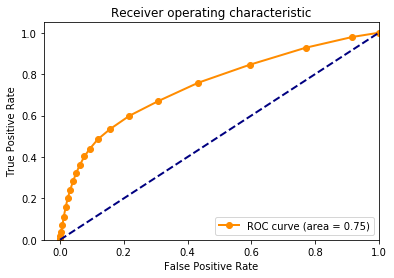

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
lw = 2
plt.plot(fpr_2, tpr_2, marker='o',color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()